In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Le principe est de mettre en série des classificateurs typés arbres de décision et de laisser les arbres en aval 
# corriger les erreurs des arbres en amont.
# Chaque arbre est spécifiquement simple avec un fort pré-élagage, la complexité du modèle est définie en fonction
# de l'intensité avec laquelle chaque successeur du pipeline essaye de corriger son prédécesseur

bc_dataset = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(bc_dataset.data, bc_dataset.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Précision pour le jeu d'entraînement : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Précision pour le jeu de test : {:.3f}".format(gbrt.score(X_test,y_test)))

Précision pour le jeu d'entraînement : 1.000
Précision pour le jeu de test : 0.965


Avec une profondeur maximale de 1
Précision pour le jeu d'entraînement : 0.991
Précision pour le jeu de test : 0.972

Avec un taux d'apprentissage de 0.01
Précision pour le jeu d'entraînement : 0.988
Précision pour le jeu de test : 0.965


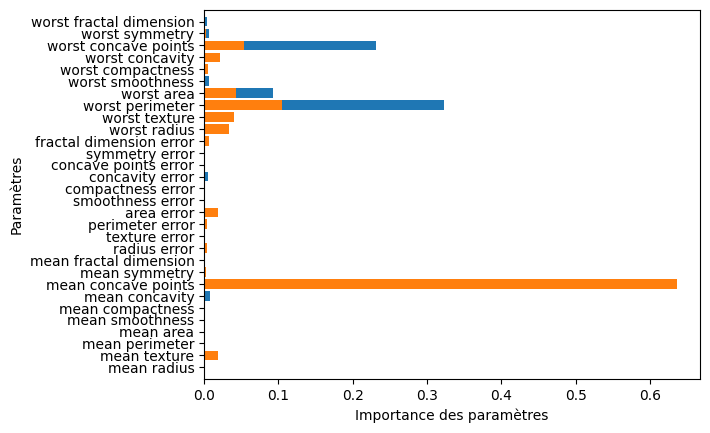

In [2]:
# Le principe du modèle implique qu'une précision parfaite sur le jeu d'entraînement démontre un surapprentissage
# On peut réduire le surapprentissage en renforcer le pré_élagage en limitant plus la profondeur
# Ou en diminuant l'intensité de l'apprentissage

from mglearn_helper import plot_feature_importances_panda_dataset

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
print("Avec une profondeur maximale de 1")
print("Précision pour le jeu d'entraînement : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Précision pour le jeu de test : {:.3f}\n".format(gbrt.score(X_test,y_test)))

# Affichage de l'importance des paramètres
plot_feature_importances_panda_dataset(gbrt, bc_dataset)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("Avec un taux d'apprentissage de 0.01")
print("Précision pour le jeu d'entraînement : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Précision pour le jeu de test : {:.3f}".format(gbrt.score(X_test,y_test)))

# Affichage de l'importance des paramètres
plot_feature_importances_panda_dataset(gbrt, bc_dataset)

# L'élagage réduit le nombre de dimensions utiles
# La diminution du taux d'apprentissage réduit le poids des dimensions sauf une